In [86]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import pandas as pd
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm
% matplotlib inline

nc_filename = sorted(glob.glob('/ocean/xiaoxiny/research/data/total/T*.csv'))
nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
print("found *.csv file: \n{}".format(nc_filename_))



filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*T200201-200712*.nc'))
ptrc=nc.Dataset(filename[0])
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

found *.csv file: 
['/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/1_ref5.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60c.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60c2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60c3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/fi

In [87]:
import statsmodels.api as sm

Green      : 0.0401827442891 95.7064180342
Yellow: 0.101031206953 245.792959443


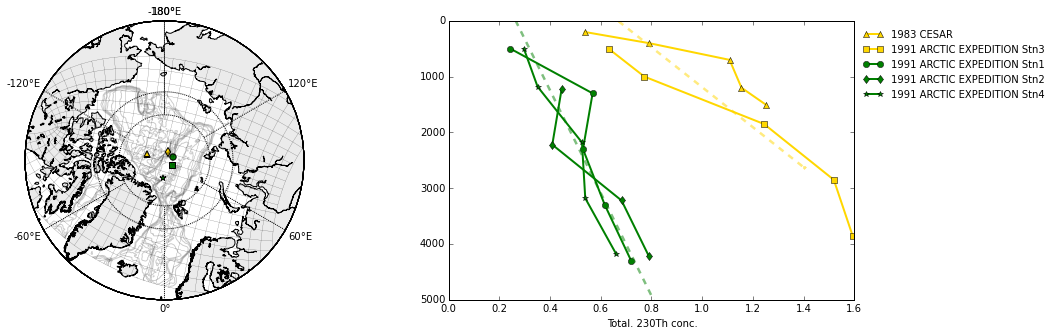

In [88]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple',\
     'yellowgreen','yellowgreen','yellowgreen']
mark=['^','s','o','d','*','H','D','>']

i=0
# 1983,1991

for j in ([0,5,6,7,8]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];

    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
##============================
err_=[]
x_=[]
y_=[]

for j in ([0,7]):
    data=pd.read_csv(nc_filename_[j])
    if j==0:
        start=2
    else:
        start=1
    y= data['depth'][start:].values;
    x=data['230Th part.'][start:]+data['230Th diss.'][start:];

    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
res_wls = sm.WLS(x_, y2).fit()
#res_wls = sm.WLS(x_, y2, weights=1./err_**2).fit()#conc. depth
if j !=0:
    plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

a=res_wls.params[0] #slope
b=res_wls.params[1] #cons.  
Q= 0.0267
kd=0.5

k_=Q/a
s_=(kd/k_+1)*Q/b
print 'Green      :',s_ , k_


##============================
err_=[]
x_=[]
y_=[]

for j in ([5,6,8]):
    data=pd.read_csv(nc_filename_[j])
    if j==8:
        start=1
    else:
        start=0
    y= data['depth'][start:].values;
    x=data['230Th part.'][start:]+data['230Th diss.'][start:];

    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    if j<12:
        name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        #err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
res_wls = sm.WLS(x_, y2).fit()
#res_wls = sm.WLS(x_, y2, weights=1./err_**2).fit()#conc. depth
if j !=0:
    plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

a=res_wls.params[0] #slope
b=res_wls.params[1] #cons.  
Q= 0.0267
k__=Q/a
s__=(kd/k__+1)*Q/b
print 'Yellow:',s__, k__

plt.ylim(0,5000);plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('Total. 230Th conc.');plt.show()

In [89]:
#method2

Yellow     : 554.092298573
Green      : 967.486964181
Yellowgreen: 347.450493385


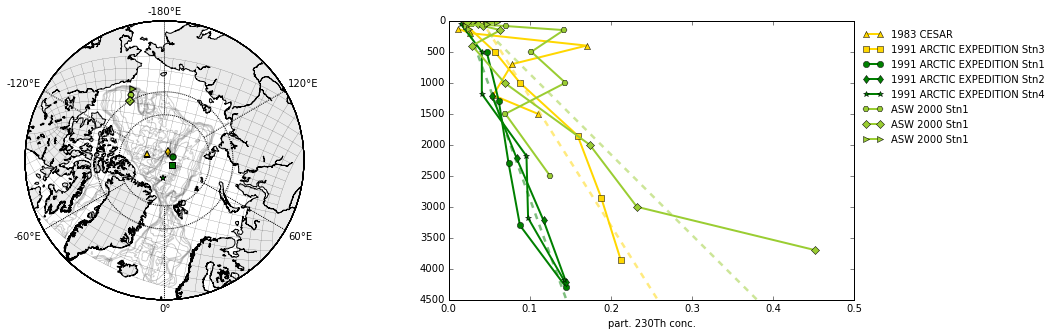

In [90]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple',\
     'yellowgreen','yellowgreen','yellowgreen']
mark=['^','s','o','d','*','H','D','>']
i=0
# 1983,1991
for j in ([0,5,6,7,8,11,12,13]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    if j<12:
        name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
err_=[]
x_=[]
y_=[]

for j in ([0,7]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['230Th part.']#+data['230Th diss.'];
    err =data['Th_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
res_wls = sm.WLS(x_, y2).fit()
#res_wls = sm.WLS(x_, y2, weights=1./err_**2).fit()#conc. depth
if j !=0:
    plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

s=0.0267/res_wls.params[0]
print 'Yellow     :',s

##============================
err_=[]
x_=[]
y_=[]

for j in ([5,6,8]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['230Th part.']#+data['230Th diss.'];
    err =data['Th_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
res_wls = sm.WLS(x_, y2).fit()
#res_wls = sm.WLS(x_, y2, weights=1./err_**2).fit()#conc. depth
if j !=0:
    plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

s_=0.0267/res_wls.params[0]
print 'Green      :',s_


##============================
err_=[]
x_=[]
y_=[]

for j in ([11,12,13]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['230Th part.']#+data['230Th diss.'];
    #err =data['Th_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    if j<12:
        name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        #err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
res_wls = sm.WLS(x_, y2).fit()
#res_wls = sm.WLS(x_, y2, weights=1./err_**2).fit()#conc. depth
if j !=0:
    plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

s__=0.0267/res_wls.params[0]
print 'Yellowgreen:',s__



plt.xlim(0,0.5);plt.ylim(0,4500);plt.gca().invert_yaxis();
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('part. 230Th conc.');plt.show()

Green:      k 0.101652929206 k_1 0.5
Yellow:     k 0.168750270245 k_1 0.5


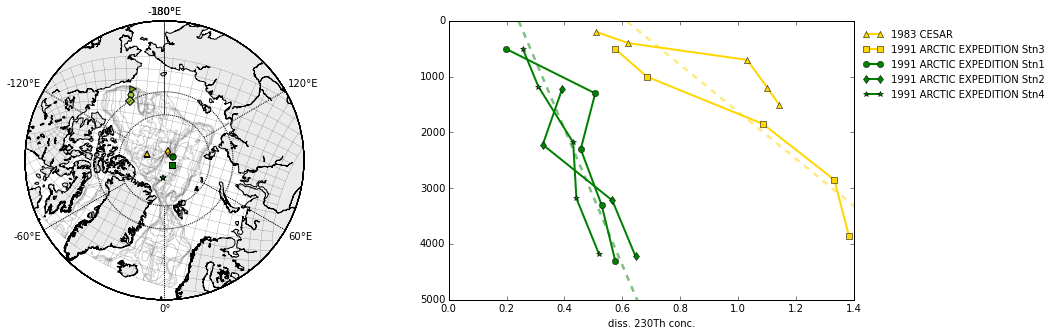

In [91]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple',\
     'yellowgreen','yellowgreen','yellowgreen']
mark=['^','s','o','d','*','H','D','>']

i=0
# 1983,1991
for j in ([0,5,6,7,8,11,12,13]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    if j<12:
        name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0

#===============================================
err_=[]
x_=[]
y_=[]


for j in ([0,7]):
    if j ==0:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[2:];
        x=data['230Th diss.'][2:]
        err =data['Th_diss_err'][2:]
    else:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[1:];
        x=data['230Th diss.'][1:]#+data['230Th diss.'];
        err =data['Th_diss_err'][1:]
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
res_wls = sm.WLS(x_, y2).fit()
#res_wls = sm.WLS(x_, y2, weights=1./err_**2).fit()#conc. depth
if j !=0:
    plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

a=res_wls.params[0] #slope
b=res_wls.params[1] #cons.  
Q= 0.0267
Jvalue_=0.5
Kvalue_=Q/s*Jvalue_/a


print 'Green:      k',Kvalue_,'k_1',Jvalue_
    
#====================================

err_=[]
x_=[]
y_=[]

for j in ([5,6,8]):
    if j==8:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[1:];
        x=data['230Th diss.'][1:]
        err =data['Th_diss_err']
    else:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values;
        x=data['230Th diss.']#+data['230Th diss.'];
        err =data['Th_diss_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
res_wls = sm.WLS(x_, y2).fit()
#res_wls = sm.WLS(x_, y2, weights=1./err_**2).fit()#conc. depth
if j !=0:
    plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

a=res_wls.params[0] #slope
b=res_wls.params[1] #cons.     

Kvalue_=Q/s_*Jvalue_/a

print 'Yellow:     k',Kvalue_,'k_1',Jvalue_



plt.ylim(0,5000);plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('diss. 230Th conc.');plt.show()

In [92]:
ice=[0.923636,0.35]   #NASA
k=[0.168750270245,0.101652929206]
s=[554.092298573,967.486964181]

In [93]:
ice_ = sm.add_constant(ice,prepend=False)

paraS=sm.WLS(s,ice_).fit()
paraK=sm.WLS(k,ice_).fit()

[0 1] [ 1219.71683288   499.06006516]


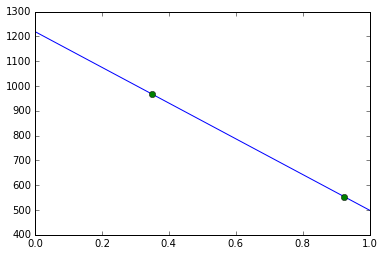

In [94]:
# s and ice
x=np.array([0,1])
yS=x*paraS.params[0]+paraS.params[1]
print x,yS
plt.plot(x,yS)
plt.plot(np.array(ice), np.array(s), 'o')

[0 1] [ 0.06071396  0.17768245]


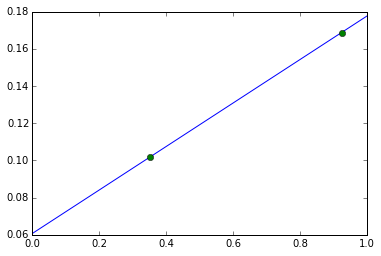

In [95]:
#k and ice
yK=x*paraK.params[0]+paraK.params[1]
print x,yK
plt.plot(x,yK)
plt.plot(np.array(ice), np.array(k), 'o')

[0 1] [ 0.03996095  0.16922026]


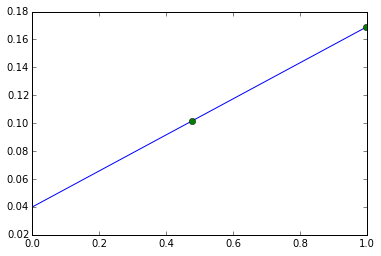

In [96]:
# merged version of NASA Team and bootstrap Team

ice_m=[0.996364,0.477273]   #merged

icem_ = sm.add_constant(ice_m,prepend=False)
para=sm.WLS(k,icem_).fit()
y=x*para.params[0]+para.params[1]
print x,y[:]
plt.plot(x,y)
plt.plot(np.array(ice_m), np.array(k), 'o')